# Measuring the height, width and frequency of a peak

In [1]:
using PyPlot, Spectra, Random

┌ Info: Recompiling stale cache file /home/charles/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
│   exception = ErrorException("Required dependency PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0] failed to load from a cache file.")
└ @ Base loading.jl:969
┌ Info: Recompiling stale cache file /home/charles/.julia/compiled/v1.1/Spectra/1ZxqJ.ji for Spectra [391af1a9-06f1-59d3-8d21-0be089654739]
└ @ Base loading.jl:1184
┌ Warning: Module PyPlot with build ID 425616386806668 is missing from the cache.
│ This may mean PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Info: Recompiling stale cache file /home/charles/.julia/compiled/v1.1/LsqFit/GCdY9.ji for LsqFit [2fda8390-95c7-5789-9bda-21331edee243]
└ 

## Signal generation

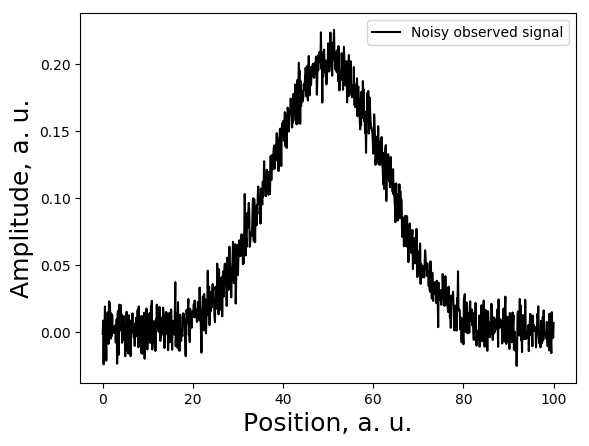

PyObject <matplotlib.legend.Legend object at 0x7f32311aa908>

In [2]:
# the x axis
x = collect(0:0.1:100)

# a scale factor that you can change
scale = 0.01

# a fake signal: perfect y
y_tot, y_peaks = gaussiennes([20.],[50.],[15.],x)
y_perfect = scale.*y_tot

# we add noise: observed y
y = scale.*(y_tot + randn(size(y_tot,1)))

figure()
plot(x,y,"k-",label="Noisy observed signal")
xlabel("Position, a. u.",fontname="Sans",fontsize = 18)
ylabel("Amplitude, a. u.", fontname = "Sans", fontsize = 18)
legend()

## Estimates are done with the peakmeas function on a smoothed signal.

In [3]:
height, hwhm, position, centroid, smoothed_y = peakmeas(x,vec(y),smoothing = "yes", method= "savgol",  y_smo_out = true)

println("Estimated peak height is $(height)")
println("Estimated peak hwhm is $(hwhm)")
println("Estimated peak position is $(position)")
println("Estimated peak centroid is $(centroid)")


Estimated peak height is 0.2020625734926841
Estimated peak hwhm is 50.2
Estimated peak position is 14.95
Estimated peak centroid is 50.00421659698443


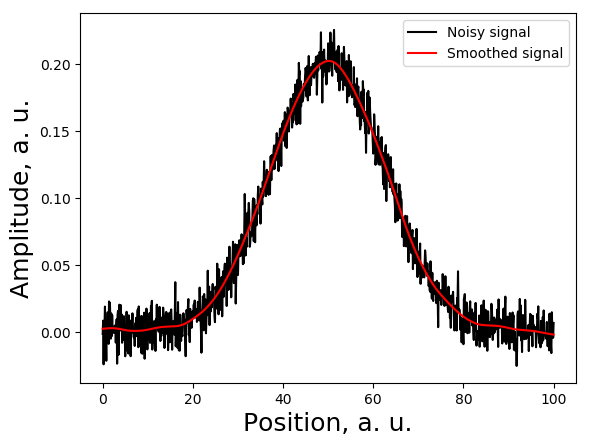

PyObject <matplotlib.legend.Legend object at 0x7f3231054cc0>

In [4]:
figure()
plot(x,y,"k-",label="Noisy signal")
plot(x,smoothed_y,"r-",label="Smoothed signal")
xlabel("Position, a. u.",fontname="Sans",fontsize = 18)
ylabel("Amplitude, a. u.", fontname = "Sans", fontsize = 18)
legend()

## Smoothed signal is not great: let's tweek the smoothing functipon to the GCVSmoothedNSpline one

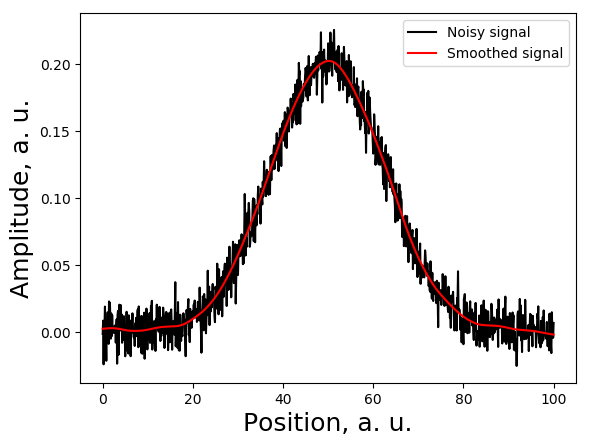

Estimated peak height is 0.2020625734926841
Estimated peak hwhm is 50.2
Estimated peak position is 14.95
Estimated peak centroid is 50.00421659698443


PyObject <matplotlib.legend.Legend object at 0x7f3257117f98>

In [5]:
height, hwhm, position, centroid, smoothed_y = peakmeas(x,vec(y),smoothing = "yes", method = "GCVSmoothedNSpline",y_smo_out=true)

println("Estimated peak height is $(height)")
println("Estimated peak hwhm is $(hwhm)")
println("Estimated peak position is $(position)")
println("Estimated peak centroid is $(centroid)")

figure()
plot(x,y,"k-",label="Noisy signal")
plot(x,smoothed_y,"r-",label="Smoothed signal")
xlabel("Position, a. u.",fontname="Sans",fontsize = 18)
ylabel("Amplitude, a. u.", fontname = "Sans", fontsize = 18)
legend()

## The GCVSmoothedNSpline algorithm seems to provide a pretty good smoothing of noisy signals.